In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')
Survived_train = train_df.Survived.copy()
train_no_survive = train_df.drop(['Survived'],axis = 1)
datagroup = [train_no_survive,test_df]
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [147]:
for dataset in datagroup:
    dataset['Age'] = dataset.Age.fillna(dataset.Age.mean())
    dataset['Title'] = dataset.Name.str.split(',',expand = True)[1].str.split('.',expand = True)[0].str.strip(' ')
    dataset['LastName'] = dataset.Name.str.split(',',expand = True)[0]
    dataset = pd.concat([dataset,pd.get_dummies(dataset['Sex'])],axis = 1)

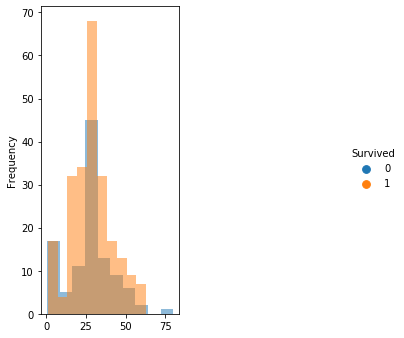

In [148]:
sns.catplot(x = 'Sex',y='Age',hue = 'Survived',data = train_df)

train_df = pd.read_csv('titanic/train.csv')
train_df['Age'] = train_df.Age.fillna(train_df['Age'].mean())
train_df = pd.concat([train_df,pd.get_dummies(train_df['Sex'])],axis = 1)
survived_male = train_df[(train_df['Survived']==1) & (train_df['male']==1)]
survived_female = train_df[(train_df['Survived'] == 1) & (train_df['female'] == 1)]
#train_df[train_df['Survived'] == 1 ].Age.plot.hist()
fig = plt.subplot(1,2,1)
survived_male.Age.plot.hist(alpha = 0.5)
survived_female.Age.plot.hist(alpha = 0.5)

In [149]:
man_title = ["Capt","Don","Major","Col","Rev","Dr","Sir","Mr","Jonkheer"]
woman_title = ["Dona","the Countess","Mme","Mlle","Ms","Miss","Lady","Mrs"]
man_map = {}
woman_map = {}
for title in man_title:
    man_map[title] = 'man'
for title in woman_title:
    woman_map[title] = 'woman'
for dataset in datagroup:
    dataset['Title'] = dataset['Title'].apply(lambda x:'man' if x in man_title else x)
    dataset['Title'] = dataset['Title'].apply(lambda x:'woman' if x in woman_title else x)
    dataset['Title'] = dataset['Title'].apply(lambda x:'boy' if x == 'Master' else x)

In [150]:
dataset = pd.concat([train_no_survive,test_df],axis = 0)
freqName = train_no_survive.groupby('LastName').size()
train_no_survive['LastNameFreq'] = train_no_survive['LastName'].map(freqName)
train_no_survive['LastName'] = np.where(train_no_survive['Sex'] == 'male','NoGroup',train_no_survive['LastName'])
train_no_survive['LastName'] = np.where(train_no_survive['LastNameFreq'] < 2, 'NoGroup', train_no_survive['LastName'])

In [151]:
train_no_survive.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,LastNameFreq
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man,NoGroup,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,woman,NoGroup,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,woman,NoGroup,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,woman,Futrelle,2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man,NoGroup,2


In [152]:
train_df = pd.concat([train_no_survive,Survived_train],axis = 1)
survivalRate = train_df.groupby('LastName').Survived.mean()
train_df['LastNameSurvival'] = train_df['LastName'].map(survivalRate)
train_df['AdjustedSurvival'] = ((train_df['LastNameSurvival']*train_df['LastNameFreq'] - train_df['Survived'])/(train_df['LastNameFreq']-1))
train_df.head()
train_df[(train_df['AdjustedSurvival'] >= 0.9)]
test_df['LastNameSurvival'] = test_df['LastName'].map(survivalRate)
test_df['LastNameSurvival'] = test_df['LastNameSurvival'].fillna(0)
#dataset.groupby('LastNameSurvival').size()

In [153]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,LastNameSurvival
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,man,Kelly,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,woman,Wilkes,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,man,Myles,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,man,Wirz,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,woman,Hirvonen,0.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,man,Svensson,0.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,woman,Connolly,0.0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,man,Caldwell,1.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,woman,Abrahim,0.0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,man,Davies,0.0


In [159]:
test_df['Survived'] = 0
test_df['Survived'] = np.where(test_df['Title'] == 'woman',1,0)
#test_df.loc[(test_df['Title']=='woman') & (test_df['LastNameSurvival'] == 0.0),'Survived'] = 0
test_df.loc[(test_df['Title'] == 'boy'),'Survived'] = 1
test_df.loc[(test_df['Pclass'] == 3) & (test_df['Embarked'] == 'S'),'Survived'] = 0

In [160]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,LastNameSurvival,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,man,Kelly,1.0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,woman,Wilkes,0.0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,man,Myles,0.0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,man,Wirz,0.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,woman,Hirvonen,0.0,0


In [161]:
prediction = pd.concat([test_df['PassengerId'],test_df['Survived']],axis = 1)
prediction.to_csv('titanic/wcg.csv' , index = False)

In [158]:
prediction = pd.read_csv('titanic/wcg.csv')
prediction.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [171]:
pd.pivot_table(train_df,values = 'Survived',columns = 'Sex',index = ['Pclass','Embarked'] )

Sex                female      male
Pclass Embarked                    
1      C         0.976744  0.404762
       Q         1.000000  0.000000
       S         0.958333  0.354430
2      C         1.000000  0.200000
       Q         1.000000  0.000000
       S         0.910448  0.154639
3      C         0.652174  0.232558
       Q         0.727273  0.076923
       S         0.375000  0.128302